**Analisis de calidad de los datos y analisis de outliers**

A continuación vamos a preparar los datos para el análisis posterior de cohortes. Sabemos que nuestro cliente está ubicado en la costa sur de los Estados Unidos, además de Newyork.

In [127]:
%run './EDA.ipynb'

['/Users/juli/uoc/02_intensivoUOC/git/AvoEconomics', '/opt/anaconda3/lib/python39.zip', '/opt/anaconda3/lib/python3.9', '/opt/anaconda3/lib/python3.9/lib-dynload', '', '/opt/anaconda3/lib/python3.9/site-packages', '/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/opt/anaconda3/lib/python3.9/site-packages/setuptools/_vendor', '/Users/juli/uoc/02_intensivoUOC/git/AvoEconomics']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  

In [ ]:
df_avocado_hotels.describe()

,AveragePrice,Total Volume,4046,4225,4770,year,cant_toneladas,precio_tonelada
count,3718.000000,3.718000e+03,3.718000e+03,3.718000e+03,3718.000000,3718.000000,3718.000000,3718.000000
mean,1.438502,3.388405e+05,1.288272e+05,1.244726e+05,5448.610143,2016.147929,338.840514,5182.336414
std,0.450889,4.482042e+05,1.945241e+05,2.324896e+05,18223.195245,0.940043,448.204165,1379.265585
min,0.510000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.080000,2040.001479
25%,1.100000,9.586413e+03,1.582102e+03,7.211725e+02,0.000000,2015.000000,9.587500,4166.965908
50%,1.390000,7.176927e+04,1.016464e+04,2.005103e+04,68.935000,2016.000000,71.770000,5030.602158
75%,1.740000,5.238998e+05,1.864631e+05,1.561921e+05,2019.927500,2017.000000,523.897500,6109.523130
max,3.250000,2.959541e+06,1.134750e+06,2.283465e+06,279630.350000,2018.000000,2959.540000,10833.943114


In [ ]:
df_producer_prices

,Area Code (M49),Area,Element,Year,Unit,Value
0,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2008,USD,338.6
1,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2009,USD,376.7
2,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2010,USD,396.4
3,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2011,USD,413.6
4,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2012,USD,423.0
...,...,...,...,...,...,...
153,862,Venezuela (Bolivarian Republic of),Producer Price (USD/tonne),2010,USD,3311.3
154,862,Venezuela (Bolivarian Republic of),Producer Price (USD/tonne),2011,USD,1741.5
155,862,Venezuela (Bolivarian Republic of),Producer Price (USD/tonne),2012,USD,1893.1
156,862,Venezuela (Bolivarian Republic of),Producer Price (USD/tonne),2013,USD,2182.5


In [140]:
df_livestock
#df_livestock.isnull().sum()

,Area Code (M49),Area,Element Code,Element,Year,Unit,Value
18,32,Argentina,5910,Export Quantity,2015,t,84.18
19,32,Argentina,5922,Export Value,2015,1000 USD,217.00
22,32,Argentina,5910,Export Quantity,2016,t,142.60
23,32,Argentina,5922,Export Value,2016,1000 USD,237.00
26,32,Argentina,5910,Export Quantity,2017,t,12.62
...,...,...,...,...,...,...,...
897,19,Americas,5922,Export Value,2020,1000 USD,4162986.00
900,19,Americas,5910,Export Quantity,2021,t,2107300.62
901,19,Americas,5922,Export Value,2021,1000 USD,4787698.00
904,19,Americas,5910,Export Quantity,2022,t,1968498.78


In [141]:
# Verificar homogeneización
units_check = {
    'df_avocado_hotels': df_avocado_hotels.dtypes,
    'df_producer_prices': df_producer_prices.dtypes,
    'df_livestock': df_livestock.dtypes,
}
units_check

{'df_avocado_hotels': Date               datetime64[ns]
 AveragePrice              float64
 Total Volume              float64
 4046                      float64
 4225                      float64
 4770                      float64
 type                       object
 year                        int64
 region                     object
 location                   object
 cant_toneladas            float64
 precio_tonelada           float64
 dtype: object,
 'df_producer_prices': Area Code (M49)      int64
 Area                object
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object,
 'df_livestock': Area Code (M49)      int64
 Area                object
 Element Code         int64
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object}

## Cálculo de outliers

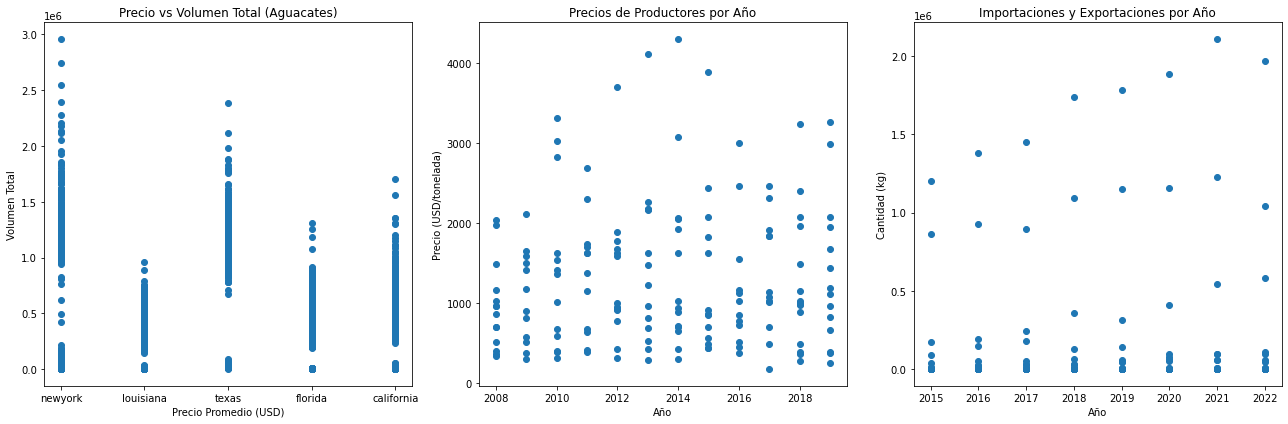

In [142]:
# Graficar dispersión para detección de outliers
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot 1: Precio vs Volumen Total (Aguacates)
#ax[0].scatter(df_avocado_hotels['AveragePrice'], df_avocado_hotels['Total Volume'])
ax[0].scatter(df_avocado_hotels['location'], df_avocado_hotels['Total Volume'])

ax[0].set_title("Precio vs Volumen Total (Aguacates)")
ax[0].set_xlabel("Precio Promedio (USD)")
ax[0].set_ylabel("Volumen Total")

# Scatter Plot 2: Precio de Productores por Año
ax[1].scatter(df_producer_prices['Year'], df_producer_prices['Value'])
ax[1].set_title("Precios de Productores por Año")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Precio (USD/tonelada)")

# Scatter Plot 3: Importaciones vs Exportaciones (Ganado)
df_import_export = df_livestock[df_livestock['Element'].isin(['Import Quantity','Export Quantity'])]
ax[2].scatter(df_import_export['Year'], df_import_export['Value'])
ax[2].set_title("Importaciones y Exportaciones por Año")
ax[2].set_xlabel("Año")
ax[2].set_ylabel("Cantidad (kg)")

plt.tight_layout()
plt.show()

In [144]:
# Verificar los rangos de valores en Total Volume para cada tipo
organico_range = df_avocado_hotels[df_avocado_hotels['type'] == 'organic']['Total Volume'].describe()
convencional_range = df_avocado_hotels[df_avocado_hotels['type'] == 'conventional']['Total Volume'].describe()

organico_range, convencional_range

(count      1859.000000
 mean      15321.829268
 std       23009.879521
 min          84.560000
 25%        4352.530000
 50%        9578.900000
 75%       19256.415000
 max      495083.690000
 Name: Total Volume, dtype: float64,
 count    1.859000e+03
 mean     6.623592e+05
 std      4.380767e+05
 min      4.050736e+04
 25%      3.429367e+05
 50%      5.239937e+05
 75%      9.929276e+05
 max      2.959541e+06
 Name: Total Volume, dtype: float64)

In [145]:
# Verificar fechas comunes
date_check = {
    'avocado_dates': (df_avocado_hotels['Date'].min(), df_avocado_hotels['Date'].max()),
    'producer_prices_years': (df_producer_prices['Year'].min(), df_producer_prices['Year'].max()),
    'livestock_years': (df_livestock['Year'].min(), df_livestock['Year'].max())
}
date_check

{'avocado_dates': (Timestamp('2015-01-04 00:00:00'),
  Timestamp('2018-03-25 00:00:00')),
 'producer_prices_years': (2008, 2019),
 'livestock_years': (2015, 2022)}

## Calculo de los precios de productores

In [135]:
# Filtrar los 10 productores con el precio más bajo
top_10_lowest_producers = df_producer_prices_filtered.nsmallest(10, 'Value')
top_10_lowest_producers

,Area Code (M49),Area,Element,Year,Unit,Value
95,600,Paraguay,Producer Price (USD/tonne),2017,USD,173.8
38,214,Dominican Republic,Producer Price (USD/tonne),2013,USD,286.7
39,214,Dominican Republic,Producer Price (USD/tonne),2014,USD,306.4
34,214,Dominican Republic,Producer Price (USD/tonne),2009,USD,306.9
37,214,Dominican Republic,Producer Price (USD/tonne),2012,USD,315.7
59,222,El Salvador,Producer Price (USD/tonne),2010,USD,317.2
0,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2008,USD,338.6
33,214,Dominican Republic,Producer Price (USD/tonne),2008,USD,367.2
1,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2009,USD,376.7
41,214,Dominican Republic,Producer Price (USD/tonne),2016,USD,378.1


In [136]:
# Calcular el precio medio anual que pagamos por tonelada
# Filtrar las fechas hasta diciembre de 2017
df_avocado_filtered = df_avocado_hotels[df_avocado_hotels['Date'].dt.year <= 2017]

# Calcular el precio medio anual pagado por tonelada
df_avg_price_paid = df_avocado_filtered.groupby(df_avocado_filtered['Date'].dt.year)['precio_tonelada'].mean().round().reset_index()
df_avg_price_paid.columns = ['Year', 'Avg Price Paid (USD/ton)']
df_avg_price_paid

,Year,Avg Price Paid (USD/ton)
0,2015,4960.0
1,2016,4996.0
2,2017,5654.0


##Pruebas fallidas

Se intentó realizar la ampliación de los datos del 2018, pero como se han creado nuevas columnas, quedarían muchos datos faltantes.

In [137]:
# Completar las fechas del 2018 del data set de la compra de aguacates de compras del hotel

# Filtrar datos para New York
df_newyork = df_avocado_filtered[df_avocado_filtered['location'] == 'newyork']

# Calcular el promedio mensual de AveragePrice para New York en los años 2015-2017
monthly_avg_price_ny = df_newyork.groupby(['Month'])['AveragePrice'].mean().reset_index()

# Crear un rango de fechas para todo el año 2018
date_range_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='W')

# Generar precios para 2018 basados en el promedio mensual de New York
completed_2018_ny = []
for date in date_range_2018:
    month = date.month
    # Obtener el promedio mensual correspondiente para New York
    avg_price = monthly_avg_price_ny[monthly_avg_price_ny['Month'] == month]['AveragePrice'].values[0]
    # Añadir ligera variación para realismo, asegurando precios positivos
    avg_price_with_variation = max(avg_price + np.random.uniform(-0.05, 0.05), 0.01)
    # Generar un volumen total basado en la media y desviación estándar de New York
    total_volume = max(np.random.normal(df_newyork['Total Volume'].mean(), df_newyork['Total Volume'].std()), 0)
    # Añadir datos
    completed_2018_ny.append({
        'Date': date,
        'AveragePrice': avg_price_with_variation,
        'Total Volume': total_volume,
        'location': 'newyork'
    })

# Crear un DataFrame con los datos generados para New York en 2018
df_completed_2018_ny = pd.DataFrame(completed_2018_ny)

# Visualizar los datos generados para 2018 en New York
df_completed_2018_ny.head()



KeyError: 'Month'

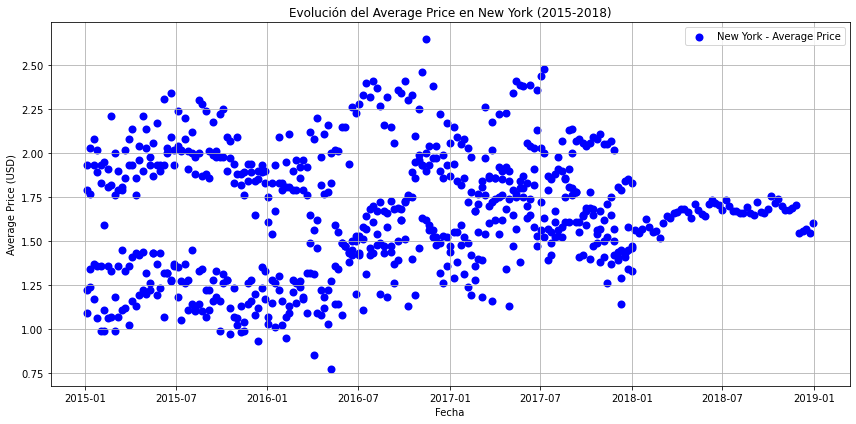

In [ ]:
# Visualizar la evolución de AveragePrice para New York
plt.figure(figsize=(12, 6))

# Filtrar los datos de New York, incluyendo los años 2015-2018
df_ny_extended = pd.concat([df_newyork, df_completed_2018_ny], ignore_index=True)
plt.scatter(df_ny_extended['Date'], df_ny_extended['AveragePrice'], label='New York - Average Price', linewidth=2, color='blue')

plt.title('Evolución del Average Price en New York (2015-2018)')
plt.xlabel('Fecha')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Calcular el promedio mensual de AveragePrice para cada región en los años 2015-2017
monthly_avg_price_by_region = df_avocado_filtered.groupby(['Month', 'region'])['AveragePrice'].mean().reset_index()

# Generar datos para 2018 basados en el patrón mensual y región
completed_2018_by_region = []

for date in date_range_2018:
    month = date.month
    for region in df_avocado_filtered['region'].unique():
        # Obtener el promedio mensual correspondiente por región
        avg_price = monthly_avg_price_by_region[
            (monthly_avg_price_by_region['Month'] == month) &
            (monthly_avg_price_by_region['region'] == region)
        ]['AveragePrice'].values[0]

        # Añadir una ligera variación aleatoria para el realismo
        avg_price_with_variation = max(avg_price + np.random.uniform(-0.05, 0.05), 0.01)  # Evitar precios negativos
        total_volume = max(np.random.normal(df_avocado_filtered['Total Volume'].mean(),
                                            df_avocado_filtered['Total Volume'].std()), 0)  # Evitar volúmenes negativos

        # Añadir los datos a la lista
        completed_2018_by_region.append({
            'Date': date,
            'AveragePrice': avg_price_with_variation,
            'Total Volume': total_volume,
            'region': region
        })

# Crear un DataFrame con los datos generados para 2018 por región
df_completed_2018_by_region = pd.DataFrame(completed_2018_by_region)

# Concatenar los DataFrames
df_avocado_extended_by_region = pd.concat([df_avocado_filtered, df_completed_2018_by_region], ignore_index=True)

# Visualizar las primeras filas del nuevo DataFrame extendido por región
df_avocado_extended_by_region.tail()


,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,location,cant_toneladas,precio_tonelada,Month
4021,2018-12-30,1.635832,2.527393e+05,NaN,NaN,NaN,NaN,NaN,NewYork,NaN,NaN,NaN,NaN
4022,2018-12-30,1.348237,0.000000e+00,NaN,NaN,NaN,NaN,NaN,Orlando,NaN,NaN,NaN,NaN
4023,2018-12-30,1.528243,0.000000e+00,NaN,NaN,NaN,NaN,NaN,Sacramento,NaN,NaN,NaN,NaN
4024,2018-12-30,1.311790,8.438607e+04,NaN,NaN,NaN,NaN,NaN,SanDiego,NaN,NaN,NaN,NaN
4025,2018-12-30,1.690789,1.287573e+06,NaN,NaN,NaN,NaN,NaN,SanFrancisco,NaN,NaN,NaN,NaN
